

# **TRABAJO FINAL MACHINE LEARNING** 
## **¿QUE PRECIO TENDRÁ EL AGUACATE?** 

Íñigo Martín Llorente;
Germán Pascual Martín;
Santiago Aliaga Estella


## Índice

## 1)	Setting it all up

## 2)	EDA

## 3)	Data Preprocessing


## 4) Modelo Explicativo

## 5)	Partición

## 6)	Algoritmos predictivos

## 7) Ensembles

## 8) Conclusiones Finales



OBJETIVO:

Predecir el precio de los aguacates en las diferentes regiones estadounidenses, analizando los diferentes factores que más afectan, con una gran utilidad económica para el mercado, especialmente para aquellas zonas dónde hay mayor importación.

Nuestros modelos serán de gran utilidad para el “nowcasting”, es decir, la predicción de los precios del aguacates en el presente y el futuro cercano, asumiendo la oferta y demanda actual. No obstante, no será muy útil para el “Forecasting”, la predicción de dichos precios a futuro, ya que dependerá de la oferta y demanda en dicho momento, que será diferente a la actual.

DATASET Y TEMA: 

El dataset inicial, sin las modificaciones realizadas, muestra semanalmente el retail scan desde 2015 a 2018 de diferentes regiones de Estados Unidos. Los datos provienen de diferentes registros de caja, que reflejan la venta real de aguacates de tipo Hass. Los datos son de multi-outlet retailers, es decir, incluye diferentes canales de venta (como los establecimientos comerciales o el ejército). Dentro del dataset encontramos 14 variables: type, year, date, number of bags (small,large.xl), region, average price, total sales y los códigos para product look up 4046, 4225 y 4770 y la región de vente. Las variables vienen recogidas en más detalle en la tabla descriptiva. 

Hemos decidido descargarnos el dataset directamente de Hass Avocado, la plataforma dónde se registran directamente los flujos de caja, ya que el primer dataset obtenido de Kaggle contenía datos anteriores 2018, y por tanto serían inútiles para nowcasting, ya que la oferta, demanda y los factores que afectan al mercado han variado notablemente desde dichos años. Tras modificar el dataset a los años 2019 – 2021, para mayor verosimilitud y menor sesgo, hemos decidido añadir una nueva variable independiente: los estados que más exportan aguacate a Estados Unidos, para ver cómo afecta al precio de los aguacates.


VARIABLE TARGET:
La variable target es el precio medio de aguacate en USA.
Al tratarse de una variable cuantitativa discreta, se trata de un problema de regresión. 
TAMAÑO DATASET Y NUMERO DE VARIABLES : 
El tamaño del Dataset es de 18242 entradas y con un total de 14 variables. 


TABLA DESCRIPTIVA DE LAS VARIABLES:

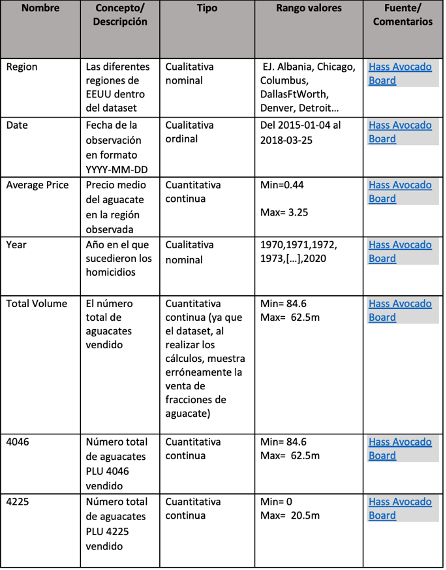

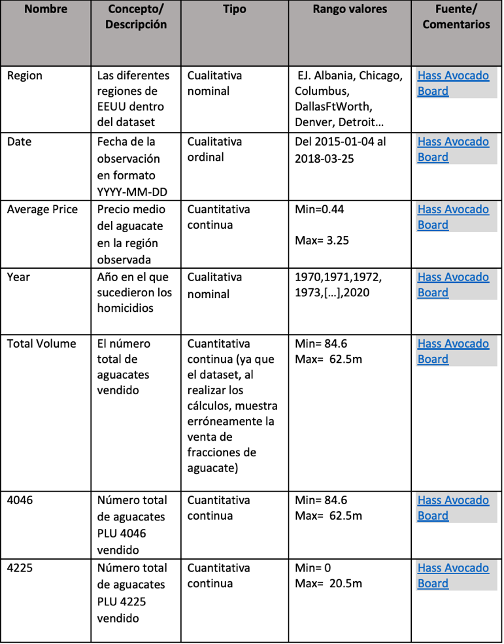

# **1. Setting it all up**

## **1.1. installing and Importing Libraries**

In [217]:
#!pip install pycaret

In [218]:
!pip install Jinja2

In [219]:
!pip install MarkupSafe==2.0.1

In [220]:
import jinja2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#import pycaret               #DESCOMENTARR PYCARET (para empezar a usar modelos)!!!!
import warnings

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
#from pycaret.regression import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## **1.2 Colors**

In [221]:
# --- Create List of Color Palletes ---
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
top_mix = ['#2A3F07', '#557F0F', '#7FBE17', '#9B9A9C', '#9B9A9C']
top_mix2 = ['#413D05', '#837A0B', '#C5B710', '#9B9A9C', '#9B9A9C']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

## **1.3 Cargamos datasets, los unimos y adaptamos**
Cargamos los datasets previamente descargados de Hass Avocado Board que se encuentran en un repositorio público de github. Esto lo hemos realizado para facilitar el uso del notebook y evitar que cada persona que quiere usarlo tenga que cargar manualmente los archivos.



In [222]:
import requests
import io

In [223]:
d2019 = requests.get('https://raw.githubusercontent.com/saliagaestella/machineLearningAvocado/main/2019-plu-total-hab-data.csv').content
d2020 = requests.get('https://raw.githubusercontent.com/saliagaestella/machineLearningAvocado/main/2020-plu-total-hab-data.csv').content
d2021 = requests.get('https://raw.githubusercontent.com/saliagaestella/machineLearningAvocado/main/2021-plu-total-hab-data.csv').content

plu_2019 = pd.read_csv(io.StringIO(d2019.decode('utf-8')))
plu_2020 = pd.read_csv(io.StringIO(d2020.decode('utf-8')))
plu_2021 = pd.read_csv(io.StringIO(d2021.decode('utf-8')))

Mostramos los datasets antes de unirlos. Los uniremos uno encima del otro, pues tienen las mismas variables y nuestro objetivo es recopilar las observaciones de los 3 años en un mismo dataset.

In [224]:
plu_2019.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
0,Albany,Weekly,2019-01-07 00:00:00,Conventional,0.921802,111277.47,3541.90,95713.80,149.31,10904.73,0.0,0.0,0.0,967.73
1,Albany,Weekly,2019-01-13 00:00:00,Conventional,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,0.0,0.0,0.0,692.81
2,Albany,Weekly,2019-01-20 00:00:00,Conventional,0.998831,146107.67,4322.20,123402.11,179.63,17223.11,0.0,0.0,0.0,980.61
3,Albany,Weekly,2019-01-27 00:00:00,Conventional,1.052065,80297.47,3380.41,64018.59,210.82,11065.69,0.0,0.0,0.0,1621.96
4,Albany,Weekly,2019-02-03 00:00:00,Conventional,0.798758,186952.91,4371.56,169578.61,357.67,11217.30,0.0,0.0,0.0,1427.77


In [225]:
plu_2021.tail()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
5659,West,Weekly,2021-11-07 00:00:00,Organic,1.899845,283421.63,25249.29,30308.10,3.34,88889.43,84126.62,193.21,0.0,138971.46
5660,Total U.S.,Weekly,2021-11-28 00:00:00,Organic,1.624900,1540492.33,65280.17,85003.19,212.79,940298.46,859897.67,9932.50,0.0,449697.72
5661,Total U.S.,Weekly,2021-11-21 00:00:00,Organic,1.605973,1731782.52,78069.16,93460.51,378.83,1090665.49,988179.98,14051.90,0.0,469208.53
5662,Total U.S.,Weekly,2021-11-14 00:00:00,Organic,1.589173,1801489.18,75786.79,99321.77,257.68,1176735.94,1073107.14,18131.56,0.0,449387.00
5663,Total U.S.,Weekly,2021-11-07 00:00:00,Organic,1.625219,1804641.37,92602.74,111229.81,163.09,1106191.68,1002625.55,17776.00,0.0,494454.04


In [226]:
print(plu_2019.shape)
print(plu_2020.shape)
print(plu_2021.shape)

(6136, 14)
(6136, 14)
(5664, 14)


Unimos datasets

In [227]:
plu_tot = pd.concat([plu_2019, plu_2020,plu_2021], axis=0) #unimos los datasets (ver si hay n/a y que hacer con ellos)!!!!

In [228]:
plu_tot.tail() #mostramos el dataset final, con el que realizaremos el trabajo

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
5659,West,Weekly,2021-11-07 00:00:00,Organic,1.899845,283421.63,25249.29,30308.10,3.34,88889.43,84126.62,193.21,0.0,138971.46
5660,Total U.S.,Weekly,2021-11-28 00:00:00,Organic,1.624900,1540492.33,65280.17,85003.19,212.79,940298.46,859897.67,9932.50,0.0,449697.72
5661,Total U.S.,Weekly,2021-11-21 00:00:00,Organic,1.605973,1731782.52,78069.16,93460.51,378.83,1090665.49,988179.98,14051.90,0.0,469208.53
5662,Total U.S.,Weekly,2021-11-14 00:00:00,Organic,1.589173,1801489.18,75786.79,99321.77,257.68,1176735.94,1073107.14,18131.56,0.0,449387.00
5663,Total U.S.,Weekly,2021-11-07 00:00:00,Organic,1.625219,1804641.37,92602.74,111229.81,163.09,1106191.68,1002625.55,17776.00,0.0,494454.04


In [229]:
plu_tot.shape

(17936, 14)

Renombramos algunas columnas, para trabajar más comodamente


In [230]:
plu_tot.rename(columns = {'Current Year Week Ending':'Date','ASP Current Year':'AP', 'Total Bulk and Bags Units':'Total Volume', 'TotalBagged Units':'Total Bags', 'SmlBagged Units': 'Small Bags','LrgBagged Units':'Large Bags','X-LrgBagged Units':'XL Bags'}, inplace = True)

Mostramos el dataset renombrado

In [231]:
plu_tot.head()

,Geography,Timeframe,Date,Type,AP,Total Volume,4046 Units,4225 Units,4770 Units,Total Bags,Small Bags,Large Bags,XL Bags,Bulk GTIN
0,Albany,Weekly,2019-01-07 00:00:00,Conventional,0.921802,111277.47,3541.90,95713.80,149.31,10904.73,0.0,0.0,0.0,967.73
1,Albany,Weekly,2019-01-13 00:00:00,Conventional,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,0.0,0.0,0.0,692.81
2,Albany,Weekly,2019-01-20 00:00:00,Conventional,0.998831,146107.67,4322.20,123402.11,179.63,17223.11,0.0,0.0,0.0,980.61
3,Albany,Weekly,2019-01-27 00:00:00,Conventional,1.052065,80297.47,3380.41,64018.59,210.82,11065.69,0.0,0.0,0.0,1621.96
4,Albany,Weekly,2019-02-03 00:00:00,Conventional,0.798758,186952.91,4371.56,169578.61,357.67,11217.30,0.0,0.0,0.0,1427.77


# **2. EDA**
El EDA (Explanatory Data Analysis) supone describir el dataset con sus principales características. 

##**2.1 Análisis estadístico variables númericas** 
En primer lugar, realizamos un análisis estadístico de las variables numéricas. Como podemos observar con la tabla, cuya intensidad de color aumenta según el valor, el precio medio de los aguacates(nuestra variable target) muestra una varianza baja, con apenas outliers y bajo rango. No obstante, el resto de variables muestran un alto nivel de ‘skewness’ , o asimetría a la derecha.

In [232]:
plu_tot[['AP', 'Total Volume', '4046 Units', '4225 Units', 
    '4770 Units', 'Total Bags', 'Small Bags', 'Large Bags',
    'XL Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AP,17936.000000,1.431678,0.396743,0.555303,1.108133,1.404040,1.706517,3.010271
Total Volume,17936.000000,913110.486942,3742946.951691,856.040000,19044.335000,128822.975000,476003.377500,54548117.440000
4046 Units,17936.000000,258497.269986,1140028.772638,0.000000,411.050000,12937.470000,114654.242500,18099712.260000
4225 Units,17936.000000,183533.635612,799656.808440,0.000000,1231.997500,11666.170000,67668.660000,15354224.300000
4770 Units,17936.000000,14559.030597,69864.986680,0.000000,0.000000,62.020000,2501.377500,1568481.690000
Total Bags,17936.000000,216627.817696,853403.528387,65.100000,9856.637500,35759.700000,115871.277500,12999193.050000
Small Bags,17936.000000,72439.651107,499517.392865,0.000000,0.000000,0.000000,10063.845000,11281462.360000
Large Bags,17936.000000,4928.120714,39944.014277,0.000000,0.000000,0.000000,0.000000,1111145.770000
XL Bags,17936.000000,3489.852445,29901.647813,0.000000,0.000000,0.000000,0.000000,679586.800000


**Conclusiones**: 

*   Precio no varía mucho
*   Mucha skewness en el resto de variables



## **2.2 Scatter plot AP y Tot. Volume**
En segundo lugar, mostramos un scatter plot del total de bolsas utilizadas y el volumen de aguacates, correspondiendo los puntos blancos a las bolsas orgánicas y los verdes a las bolsas convencionales. Se puede mostrar una correlación lineal positiva fuerte, especialmente para las cantidades más pequeñas. No obstante, podemos observar un problema grave de heterocedasticidad, donde la varianza es notablemente superior para los valores más altos de bolsas y aguacates. Por tanto, podemos afirmar con mayor seguridad la correlación positiva fuerte entre ambas variables para las cantidades más reducidas.

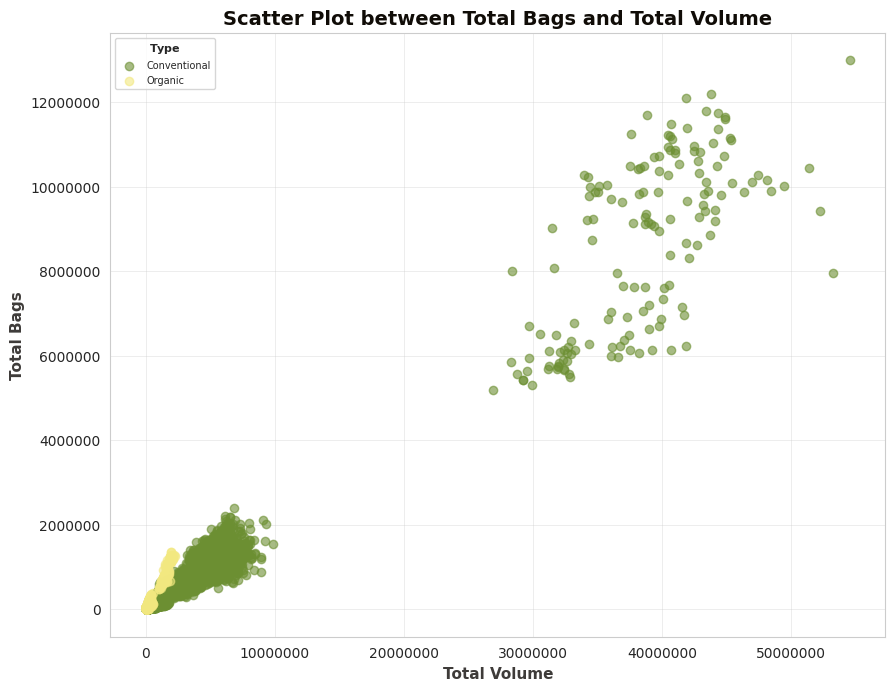

In [233]:
# --- Seperating Total Volume & Total Bags based on Type ---
x0=plu_tot.xs('Total Volume', axis=1)[plu_tot['Type']=='Conventional']
x1=plu_tot.xs('Total Volume', axis=1)[plu_tot['Type']=='Organic']
y0=plu_tot.xs('Total Bags', axis=1)[plu_tot['Type']=='Conventional']
y1=plu_tot.xs('Total Bags', axis=1)[plu_tot['Type']=='Organic']

# --- Creating Scatter Plot ---
plt.figure(figsize=(10,8))
plt.title('Scatter Plot between Total Bags and Total Volume', fontweight='bold', 
          fontsize='14', fontfamily='sans-serif', color=black_grad[0])
plt.scatter(x=x0, y=y0, c=color_mix[1], alpha=0.6, linewidths=1)
plt.scatter(x=x1, y=y1, c=color_mix[2], alpha=0.6, linewidths=1)
plt.legend(['Conventional', 'Organic'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper left', frameon=True)
plt.xlabel('Total Volume', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total Bags', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.5, lw=0.5)
plt.show()

## **2.3 AP a lo largo de los años 2019-2021**
Aquí podemos claramente visualizar la evolución del precio del aguacate a lo largo de los años que comprenden el dataset. Se puede mostrar una gran variabilidad en el precio medio, con una clara escalada durante julio de 2019, seguido por una notable disminución. Existe una correlación muy fuerte entre los aguacates orgánicos y los convencionales, siguiendo prácticamente la misma tendencia.

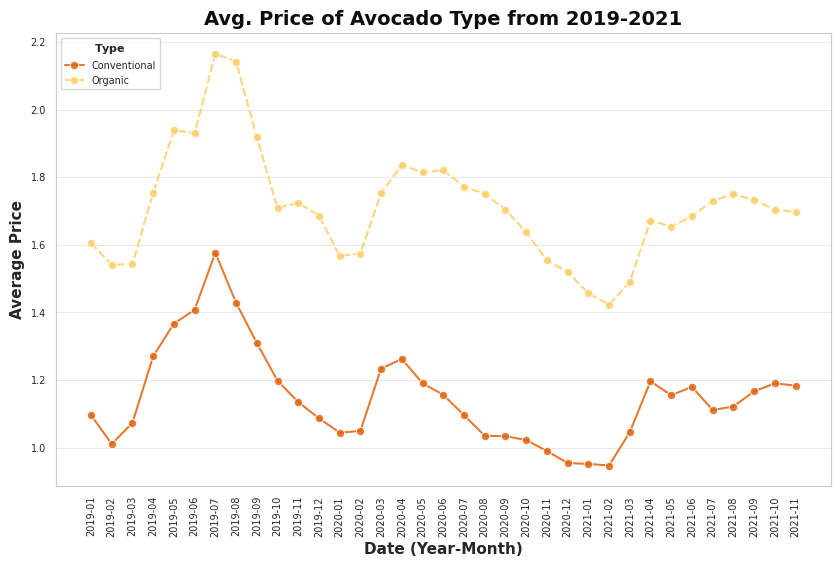

In [234]:
# --- Calculating Mean of `AveragePrice` grouped by Type and Date ---
dseda9 = plu_tot[['Date', 'AP', 'Type']]
dseda9['Date'] = pd.DatetimeIndex(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].apply(lambda x: x.strftime('%Y-%m'))
group9 = dseda9.groupby(['Date', 'Type'])
mnth_avg9 = group9.aggregate({'AP':np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize=(10,6))
plt.title('Avg. Price of Avocado Type from 2019-2021', fontweight='bold', 
          fontsize='14', fontfamily='sans-serif', color=black_grad[0])
sns.lineplot(data=mnth_avg9, x='Date', y='AP', hue='Type', 
             style='Type', markers=['o', 'o'], palette='YlOrBr_r', alpha=0.85)
plt.xlabel('Date (Year-Month)', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.ylabel('Average Price', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='90', fontsize='7')
plt.yticks(fontsize='7')
plt.grid(axis='y', alpha=0.5, lw=0.6)
plt.grid(axis='x', alpha=0)
plt.legend(labels=['Conventional','Organic'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper left', frameon=True);

**Conclusiones:**

## **2.4 Correlation Map (all numeric variables)**
El mapa de correlación, cuya intensidad de color depende inversamente de la respectiva correlación entre variables, muestra el grado de dependencia entre las variables explicativas. Como podemos observar, existen graves problemas de multicolinealidad perfecta entre ciertas variables, como por ejemplo entre 4770 units y total bags, Bulk GTIN, 4225 Units, 4096 Units o Total Units, considerando grave cualquier correlación que sea superior a 0,8. Esto podrá perjudicar la precisión de nuestro modelo y causar un sesgo indebido. 

El nivel de curtosis y asimetría de algunas variables también puede suponer un incremento en el sesgo de nuestro modelo, y por tanto una mayor diferencia entre el precio predicho y el precio real de los aguacates.


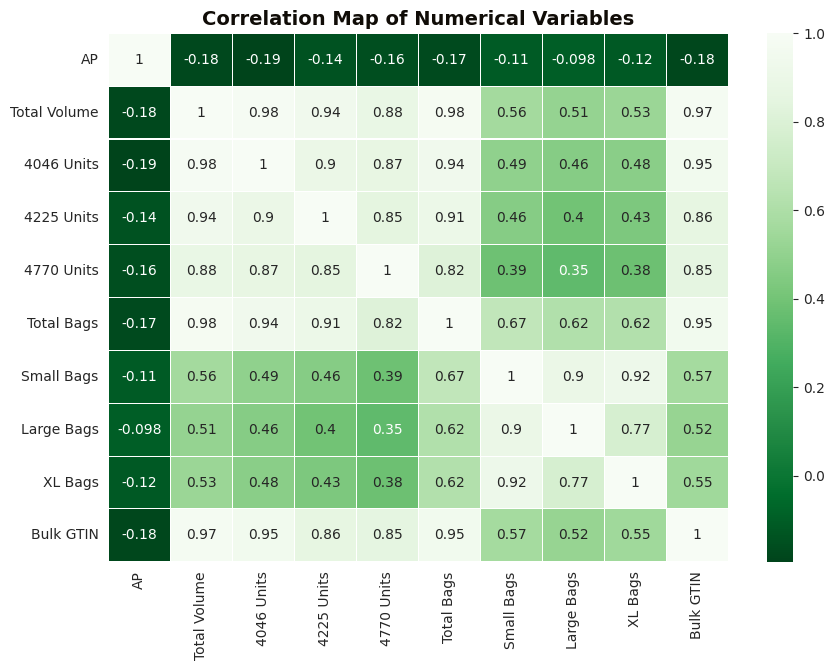

In [235]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(10,7))
sns.heatmap(plu_tot.corr(), annot=True, cmap='Greens_r', linewidths=0.1)
plt.title('Correlation Map of Numerical Variables', fontsize='14',
          fontweight='bold', fontfamily='sans-serif', color=black_grad[0]);

## **2.5 EDA Conclusion**

En conclusión, existe una gran cantidad de factores, como la curtosis, asimetría, multicolinealidad perfecta o imperfecta, que pueden afectar a la predicción del precio del aguacate. No obstante, son problemas que surgen dentro de la realidad material en la que se han realizado dichas observaciones y, por tanto, se deberá intentar minimizar su efecto o tomar en cuenta dichos problemas, pero nunca podremos eliminar por completo la relación existente entre variables que predicen el precio del aguacate.


# **3. Data Preprocessing**

## **3.1 Añadimos el % de aguacates que EEUU importa a nuestro dataset**
A continuación, procedemos a realizar un merge de datasets para poder añadir la variable que mide los Estados que más han exportado a los Estados Unidos. Consideramos que es de vital importancia y por tanto será muy útil para optimizar la predicción del precio de los aguacates. Podemos ver que California, Chile, Mexico, Peru, Colombia y la República Dominicana son los países que más exportan aguacate. 

No obstante, hemos decidido eliminar las columnas de Peru, Colombia y la República Dominicana, ya que su bajo nivel de exportaciones en relación con California, Chile y México supone que contengan NaN en sus datos, y por ende no nos aporten información nueva para nuestro modelo.




In [236]:
i2019 = requests.get('https://raw.githubusercontent.com/saliagaestella/machineLearningAvocado/main/Volume-Data-Projections-(2019).csv').content
i2020 = requests.get('https://raw.githubusercontent.com/saliagaestella/machineLearningAvocado/main/Volume-Data-Projections-(2020).csv').content
i2021 = requests.get('https://raw.githubusercontent.com/saliagaestella/machineLearningAvocado/main/Volume-Data-Projections-(2021).csv').content

imp_2019 = pd.read_csv(io.StringIO(i2019.decode('utf-8')))
imp_2020 = pd.read_csv(io.StringIO(i2020.decode('utf-8')))
imp_2021 = pd.read_csv(io.StringIO(i2021.decode('utf-8')))

Los concatenamos uno debajo del otro en orden cronológico, para que sigan el formato de nuestro main dataset (plu_tot)

In [237]:
imports = pd.concat([imp_2019, imp_2020,imp_2021], axis=0) #unimos los datasets (ver si hay n/a y que hacer con ellos)

In [238]:
imports.head()

,Week,Year,Status,Total Volume,California,Chile,Mexico,Peru,Colombia,Dominican Republic
0,"Jan 6, 2019",2019,Actual,"39,644,522",NaN,"1,111,244","38,533,278",NaN,NaN,NaN
1,"Jan 13, 2019",2019,Actual,"73,115,987","71,558","1,154,459","71,889,970",NaN,NaN,NaN
2,"Jan 20, 2019",2019,Actual,"73,262,502","35,452","681,725","72,545,325",NaN,NaN,NaN
3,"Jan 27, 2019",2019,Actual,"59,200,492","306,018","676,866","58,217,608",NaN,NaN,NaN
4,"Feb 3, 2019",2019,Actual,"45,231,823","225,945","584,756","44,421,122",NaN,NaN,NaN


Son datasets que contienen la información de la procedencia de los aguacates. Somos conscientes de que la variable Total Volume de este dataset no coincide con la variable Total Volume de nuestro main dataset. Al provenir de la misma fuente de datos y ser menor el Total Volume del dataset de procedencia, llegamos a la conclusión de que esta cifra inferior porque este dataset refleja únicamente las cantidades que provienen de los principales proveedores de agucate a EEUU. Estos son el estado de California, Chile, Mexico, Peru, Colombia y República Dominicana. Habrá otra serie de lugares (otros países o estados de EEUU) que también provean de aguacate a EEUU, pero su porcentaje individual sobre el total es tan ínfimo que no ha sido tenido cuenta.

Nuestra conclusión respecto a esto, ha sido calcular el porcentaje de aguacate importado con los datos que sí tenemos. Su cálculo se desarrollará más adelante. Ahora procederemos a realizar el merge del dataset de proveedores de aguacate con nuestro main dataset (plu_tot).

Formateamos las variables por las que vamos a unir los datasets, para que estén en to "to_datetime" las dos.

In [239]:
imports['Week'] = pd.to_datetime(imports['Week'], format = '%b %d, %Y')

In [240]:
plu_tot['Date'] = pd.to_datetime(plu_tot['Date'], format = '%Y-%m-%d %H:%M:%S')

Hacemos el merge de los dos datasets, por las fechas. Nuestro objetivo es añadir a cada observación la variable del % de aguacates que son importados. Haremos un inner dataset puesto que los datos son de la misma fuente y son cogidos en las mismas fechas por lo que estamos seguros que el % de observaciones que perderemos al realizar el inner merge es ínfimo y nos ahorramos la problemática que nos traería hacerr un left merge y los posibles Nat.

In [241]:
plu_tot = plu_tot.merge(imports, how="inner",left_on = "Date",right_on="Week")

In [242]:
plu_tot.head()

,Geography,Timeframe,Date,Type,AP,Total Volume_x,4046 Units,4225 Units,4770 Units,Total Bags,...,Week,Year,Status,Total Volume_y,California,Chile,Mexico,Peru,Colombia,Dominican Republic
0,Albany,Weekly,2019-01-13,Conventional,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,...,2019-01-13,2019,Actual,"73,115,987","71,558","1,154,459","71,889,970",NaN,NaN,NaN
1,Atlanta,Weekly,2019-01-13,Conventional,0.939337,753538.69,353448.91,31571.24,4541.22,83131.47,...,2019-01-13,2019,Actual,"73,115,987","71,558","1,154,459","71,889,970",NaN,NaN,NaN
2,Baltimore/Washington,Weekly,2019-01-13,Conventional,1.408329,835322.68,129020.58,454924.83,10258.44,227751.74,...,2019-01-13,2019,Actual,"73,115,987","71,558","1,154,459","71,889,970",NaN,NaN,NaN
3,Birmingham/Montgomery,Weekly,2019-01-13,Conventional,0.982447,331251.22,199861.90,10300.04,2623.32,57712.12,...,2019-01-13,2019,Actual,"73,115,987","71,558","1,154,459","71,889,970",NaN,NaN,NaN
4,Boise,Weekly,2019-01-13,Conventional,1.053331,121936.73,64302.83,6341.27,8789.19,11763.59,...,2019-01-13,2019,Actual,"73,115,987","71,558","1,154,459","71,889,970",NaN,NaN,NaN


Tratamos las variables de importaciones para poder operar con ellas.

In [243]:
# Quitamos las comas para pasar los datos a float

plu_tot['Mexico']=plu_tot['Mexico'].str.replace(',','')
plu_tot['California']=plu_tot['California'].str.replace(',','')
plu_tot['Chile']=plu_tot['Chile'].str.replace(',','')
plu_tot['Total Volume_y']=plu_tot['Total Volume_y'].str.replace(',','')
plu_tot = plu_tot.astype({'California':'float','Chile':'float','Mexico':'float','Total Volume_y':'float'})

**Creamos la variable % importaciones**. La calcularemos a raíz de Total Volume_y (número total de aguacates de los que conocemos su procedencia). A esta variable le restaremos los aguacates que provienen de California, el resultado será el número de aguacates que sabemos que son importados, el cual dividiremos entre el total ('Total Volume_y'), para obtener un porcentaje. Habrá un pproporción de aguacates sobre la cual no podremos decir nada, pues no sabemos si provienen de otros estados dentro de USA o de otro país. Esta porcentaje de aguacates corresponde a la diferencia entre las variables 'Total Volume_x' y 'Total Volume_y'.

In [244]:
plu_tot['Proportion Imported']=((plu_tot['Total Volume_y']-plu_tot['California'])/plu_tot['Total Volume_y'])

## **3.2 Selección variables relevantes**

Primero, realizaremos una selección de las variables que consideremaos aportan información relevante a nuestros modelos. 

In [245]:
plu_tot=plu_tot.drop(['Timeframe', 'Year', 'Total Volume_y','Peru','Colombia','Dominican Republic','California','Chile','Mexico','Week','Status'], axis=1)

## **3.3 Tratamiento de Nans y Valores Nulos** (no tenemos casi asi q lo dejamos para el final si nos da tiempo)

Y a continuación exploraremos los variables para ver sus valores nulos y como los trataremos.

In [246]:
plu_tot.dtypes

Geography                      object
Date                   datetime64[ns]
Type                           object
AP                            float64
Total Volume_x                float64
4046 Units                    float64
4225 Units                    float64
4770 Units                    float64
Total Bags                    float64
Small Bags                    float64
Large Bags                    float64
XL Bags                       float64
Bulk GTIN                     float64
Proportion Imported           float64
dtype: object

In [247]:
print("-- CANTIDAD de datos nulos por columna en el dataframe --")
print(plu_tot.isnull().sum().sort_values())
print("**************")
print("-- PORCENTAJE de datos nulos por columna en el dataframe --")
print((plu_tot.isnull().sum() / len(plu_tot) * 100).sort_values())

-- CANTIDAD de datos nulos por columna en el dataframe --
Geography                 0
Date                      0
Type                      0
AP                        0
Total Volume_x            0
4046 Units                0
4225 Units                0
4770 Units                0
Total Bags                0
Small Bags                0
Large Bags                0
XL Bags                   0
Bulk GTIN                 0
Proportion Imported    1534
dtype: int64
**************
-- PORCENTAJE de datos nulos por columna en el dataframe --
Geography              0.000000
Date                   0.000000
Type                   0.000000
AP                     0.000000
Total Volume_x         0.000000
4046 Units             0.000000
4225 Units             0.000000
4770 Units             0.000000
Total Bags             0.000000
Small Bags             0.000000
Large Bags             0.000000
XL Bags                0.000000
Bulk GTIN              0.000000
Proportion Imported    8.724832
dtype: float64

In [248]:
plu_tot['Proportion Imported'] = plu_tot['Proportion Imported'].fillna(plu_tot['Proportion Imported'].mean())

## **3.4 One hot encoding variables categóricas**
Para poder utilizar las variables categóricas, procedemos a realizar one hot encoding, el cual consiste en crear una variable dicotómica, binaria o dummie para cada una de las variables categóricas, y luego incorporar en el modelo todas menos una, que sería la categoria base o referencia. En el caso de añadir todo, tendríamos el problema de la multicolinealidad perfecta. 

In [249]:
#One hot encoding para poder usar las variables categoricas

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def onehotencoder(data):
    # cogemos los datos
    values = array(data)
    print(values)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    print(onehot_encoded)
    # invert first example
    inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
    print(inverted)
    
    return(onehot_encoded)

In [250]:
states=pd.DataFrame(onehotencoder(plu_tot['Geography']))
tipo=pd.DataFrame(onehotencoder(plu_tot['Type']))

# Cambiamos el nombre de las columnas
states.columns=array(plu_tot['Geography'][0:59])
tipo.columns=['Conventional', 'Organic']

print(plu_tot.shape[0], states.shape[0], tipo.shape[0])

['Albany' 'Atlanta' 'Baltimore/Washington' ... 'Southeast' 'West'
 'Total U.S.']
[ 0  1  2 ... 49 56 55]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['Albany']
['Conventional' 'Conventional' 'Conventional' ... 'Organic' 'Organic'
 'Organic']
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
['Conventional']
17582 17582 17582


In [251]:
plu_tot = pd.concat([plu_tot, states, tipo], axis='columns')
plu_tot = plu_tot.drop(['Geography', 'Type'], axis=1)
plu_tot.head()

,Date,AP,Total Volume_x,4046 Units,4225 Units,4770 Units,Total Bags,Small Bags,Large Bags,XL Bags,...,Great Lakes,Midsouth,Northeast,Plains,South Central,Southeast,West,Total U.S.,Conventional,Organic
0,2019-01-13,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2019-01-13,0.939337,753538.69,353448.91,31571.24,4541.22,83131.47,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2019-01-13,1.408329,835322.68,129020.58,454924.83,10258.44,227751.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2019-01-13,0.982447,331251.22,199861.90,10300.04,2623.32,57712.12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2019-01-13,1.053331,121936.73,64302.83,6341.27,8789.19,11763.59,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [252]:
plu_tot=plu_tot.set_index('Date')
plu_tot.head()

,AP,Total Volume_x,4046 Units,4225 Units,4770 Units,Total Bags,Small Bags,Large Bags,XL Bags,Bulk GTIN,...,Great Lakes,Midsouth,Northeast,Plains,South Central,Southeast,West,Total U.S.,Conventional,Organic
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-13,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,0.0,0.0,0.0,692.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-13,0.939337,753538.69,353448.91,31571.24,4541.22,83131.47,0.0,0.0,0.0,280845.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-13,1.408329,835322.68,129020.58,454924.83,10258.44,227751.74,0.0,0.0,0.0,13367.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-13,0.982447,331251.22,199861.90,10300.04,2623.32,57712.12,0.0,0.0,0.0,60753.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-13,1.053331,121936.73,64302.83,6341.27,8789.19,11763.59,0.0,0.0,0.0,30739.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **4. Modelo Explicativo**
Un modelo explicativo es aquel cuyos algoritmos necesitan interpretables, para poder rechazar o no una hipótesis nula inicial. El foco debe estar puesto en los betas, buscando que la estimación las betas sean lo más correctas posibles, y analizando como influye cada factor o variable, independientemente de cómo de eficaz sea el modelo a la hora de predecir.

Nuestro  modelo explicativo está compuesto por una serie de variables independientes que influyen de manera diferente en “AP”, el precio medio de los aguacates, siendo esta nuestra variable dependiente, endogénea o target. Cada variable independiente (4046 Units, XL Bags, Proportion Imported, Bulk GTIN, Detroit, Denver…) muestra su propio valor de Beta, afectando en diferente manera al valor del precio medio. Por ejemplo, una unidad más de “4046 Units de Aguacate” supondrá una disminución en el precio medio de 0,045 dólares y de Chicago un aumento del 0,022 dólares en el precio medio.

En nuestro modelo, para evitar overfitting y por tanto incrementos en la varianza innecesarias, no hemos añadido ni funciones logarítmicas ni cuadráticas, ya que consideramos que ninguna variable presenta efectos marginales decrecientes o se comporta de manera cuadrática. 
En primer lugar, el p-valor, probabilidad de obtener estos resultados (u otros más desfavorables) si realmente el verdadero beta fuese cero, es más elevado para las variables que miden los diferentes tipos de aguacates (4046 Units, 4225 Units…) pero nulo para la mayoría de los estados (menos algunos específicos como San Francisco con 0,555). Cuanto menor sea el p-valor, más evidencia de que los resultados no se deben al azar. El p valor tiene que ser muy pequeño para que haya más evidencia de que los resultados no son al azar. Por tanto, son especialmente significativos los Beta de los Estados con un p-valor igual a 0.
En relación con nuestro R cuadrado, que representa la proporción de varianza de la variable target (precio medio) explicada por el modelo var(Y*)/var(Y), y puede tomar valores entre 0 y 1 (0/100%). Cuanto mayor sea nuestro R cuadrado, mejor será la  bondad de ajuste del modelo. Como podemos observar, nuestro R cuadrado es elevado (0,728) y por tanto supone una elevada bondad de ajuste.

No obstante, R cuadrado siempre aumentará si se añaden variables adicionales, aunque no tengan ningún poder explicativo, y si tenemos tantas variables como datos el r cuadrado seria 100%.  Por tanto, R cuadrado ajustado emplea un coeficiente penalizador para dicho valor, que reducirá el valor de R cuadrado si existen demasiadas variables independientes explicativas, y por tanto permitirá comparar su bondad de ajuste con otros modelos. Nuestro R cuadrado ajustado, tras penalizar el modelo por el exceso de variables sigue siendo elevado (0,727). Por tanto, al ser una medida relativa, demuestra que nuestro modelo es eficaz y sofisticado.
En relación con el AIC, o Criterio de Información de AKAIKE y BIC, o el Criterio deIinformación Bayesiano de SCHWARTZ, cuanto menor sea su valor y si es negativo, cuanto más negativo, mejor será el trade-off entre el sesgo y la varianza del modelo. Al ser -5315 y -4771 respectivamente, son valores muy favorables para medir la eficiencia del modelo, previniendo así posibles casos de sobreajuste. 
Finalmente, podemos observar como la Skewness, o asimetría a la derecha, de nuestro modelo explicativo es baja (0.347), y la curtosis tan elevada supone que el modelo presenta una distribución especialmente leptocúrtica, con una distribución concentrada alrededor de la media.



In [253]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [254]:
expl_variable=plu_tot.drop(['AP'],axis=1)

In [255]:
y= plu_tot['AP']
x=expl_variable

In [256]:
olsmod = sm.OLS(y, x.astype(float)).fit() 
olsmod.summary()                                     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AP   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     678.6
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        22:01:56   Log-Likelihood:                 2727.5
No. Observations:               17582   AIC:                            -5315.
Df Residuals:                   17512   BIC:                            -4771.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Total Volume_x            0.0450      0.232      0.194      0.846      -0.410       0.500
4046 Units               -0.0450      0.232     -0.194      0.846      -0.500       0.410
4225 Units               -0.0450      0.232     -0.194      0.846      -0.500       0.410
4770 Units               -0.0450      0.232     -0.194      0.846      -0.500       0.410
Total Bags               -0.0450      0.232     -0.194      0.846      -0.500       0.410
Small Bags            -5.851e-08   1.31e-08     -4.450      0.000   -8.43e-08   -3.27e-08
Large Bags             6.088e-07   9.62e-08      6.326      0.000     4.2e-07    7.97e-07
XL Bags                2.791e-07   1.44e-07      1.935      0.053   -3.62e-09    5.62e-07
Bulk GTIN                -0.0450      0.232     -0.194      0.846      -0.500       0.410
Proportion Imported      -0.8781      0.018    -49.643      0.000      -0.913      -0.843
Albany                    0.1143      0.012      9.560      0.000       0.091       0.138
Atlanta                   0.0644      0.012      5.384      0.000       0.041       0.088
Baltimore/Washington      0.1287      0.012     10.712      0.000       0.105       0.152
Birmingham/Montgomery    -0.1257      0.012    -10.512      0.000      -0.149      -0.102
Boise                     0.2490      0.012     20.829      0.000       0.226       0.272
Boston                    0.3494      0.012     29.121      0.000       0.326       0.373
Buffalo/Rochester         0.0799      0.012      6.684      0.000       0.056       0.103
Charlotte                 0.2645      0.013     21.062      0.000       0.240       0.289
Chicago                   0.0659      0.012      5.518      0.000       0.043       0.089
Cincinnati/Dayton         0.2116      0.012     17.667      0.000       0.188       0.235
Columbus                  0.1399      0.012     11.691      0.000       0.116       0.163
Dallas/Ft. Worth          0.0516      0.012      4.314      0.000       0.028       0.075
Denver                   -0.2070      0.012    -17.286      0.000      -0.230      -0.184
Detroit                   0.0406      0.012      3.389      0.001       0.017       0.064
Grand Rapids             -0.0102      0.012     -0.852      0.394      -0.034       0.013
Harrisburg/Scranton       0.0644      0.012      5.354      0.000       0.041       0.088
Hartford/Springfield      0.0770      0.013      5.781      0.000       0.051       0.103
Houston                  -0.0434      0.012     -3.633      0.000      -0.067      -0.020
Indianapolis              0.3737      0.012     31.224      0.000       0.350       0.397
Jacksonville             -0.0968      0.012     -8.065      0.000      -0.120      -0.073
Las Vegas                 0.0103      0.012      0.862      0.389      -0.013       0.034
Los Angeles            

# **5. Partición**
Un modelo predictivo es aquel cuyo foco está en las predicciones, siendo capaces de, dados los inputs, poder predecir el valor del target con la mejor precisión posible, independientemente del impacto que tengan las diferentes variables independientes en la predicción de la variable target.

Para ello, debemos dividir el dataset actual entre el training set (que constará del 70% de este) y el testing set (30% restante). 
El conjunto de entrenamiento lo utilizaremos para ajustar y estimar el modelo, para que aprenda de los datos, y para modelar la relación entre inputs y outputs. 
El conjunto de test lo emplearemos para realizar predicciones sobre ellos y poder comparar los valores predichos de nuestra variable target con los valores reales y poder, por ende, evaluar el error de predicción y las medidas de performance predictiva utilizadas.


In [257]:
from sklearn import preprocessing
plu_values=plu_tot.values
plu_norm = preprocessing.StandardScaler().fit(plu_values).transform(plu_values.astype(float))

msk = np.random.rand(len(plu_tot)) < 0.7
train = plu_tot[msk]
test = plu_tot[~msk]

y= 'AP'
expl_variable=plu_tot.drop(['AP'],axis=1)
x=expl_variable.columns

# **6. Algoritmos predictivos:**

*   6.1 Regresión lineal
*   6.2 KNN
*   6.3 Decision Tree
*   6.4 Random Forest
*   6.5 Red Neuronal






## **6.1 Regresión lineal**
La regresión lineal, será nuestro modelo predictivo empleado para aproximar la relación lineal de dependencia entre nuestra variable dependiente o target Y (Precio Medio), y las variables independientes. Realizaremos dicha regresión, en primer lugar, en el training set para mejorar y optimizar el modelo para realizar la mejor predicción posible y poder examinarlo, a posteriori, en el test set.

Tras crear el modelo empleando los datos del training set, hemos utilizado los datos del test set, obteniendo un MSE del train 2.9504427564153287e-15 y en el test de 0.0523230601292069. Como conclusión, obtenemos que el modelo parece que funciona con grandes resultados, obteniendo un muy bajo error en el train set y un error un poco superior en el test set. Podríamos estar ante un principio de overfitting pues el error del train set es extremadamente bajo.



### **Prediciendo**

In [258]:
X_train, X_test, y_train, y_test = train_test_split( plu_norm, plu_tot[y].values, test_size=0.3, random_state=4)

In [259]:
from sklearn import linear_model
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train, y_train)
train_preds = regr_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
train_rmse_rl = sqrt(mse)
print(f'Mean squared error del train: {train_rmse_rl}')

y_pred_rl = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rl)
test_rmse_rl= sqrt(mse)
print(f'Mean squared error del test: {test_rmse_rl}')

Mean squared error del train: 2.9504427564153287e-15
Mean squared error del test: 0.0523230601292069


## **6.2 KNN**
KNN, o el método de los k vecinos más cercanos, es un método utilizado tanto para la clasificación como para la regresión supervisada. Predecimos la media (si se trata de regresión) o la moda (si es un problema de clasificación) de los K vecinos más cercanos, determinando cuales están más cerca con la distancia Eúclida o Jaccard, estandarizando los valores de muy diferente escala. 

Realizamos un nuevo Split entre training set y test set, y realizamos un gráfico mostrando la relación entre el número de K vecinos más cercanos y el Mean Squared Error. 



Hacemos un nuevo split e importamos librerías

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (12307, 72) (12307,)
Set de Prueba: (5275, 72) (5275,)


Text(0.5, 1.0, 'ELBOW PLOT')

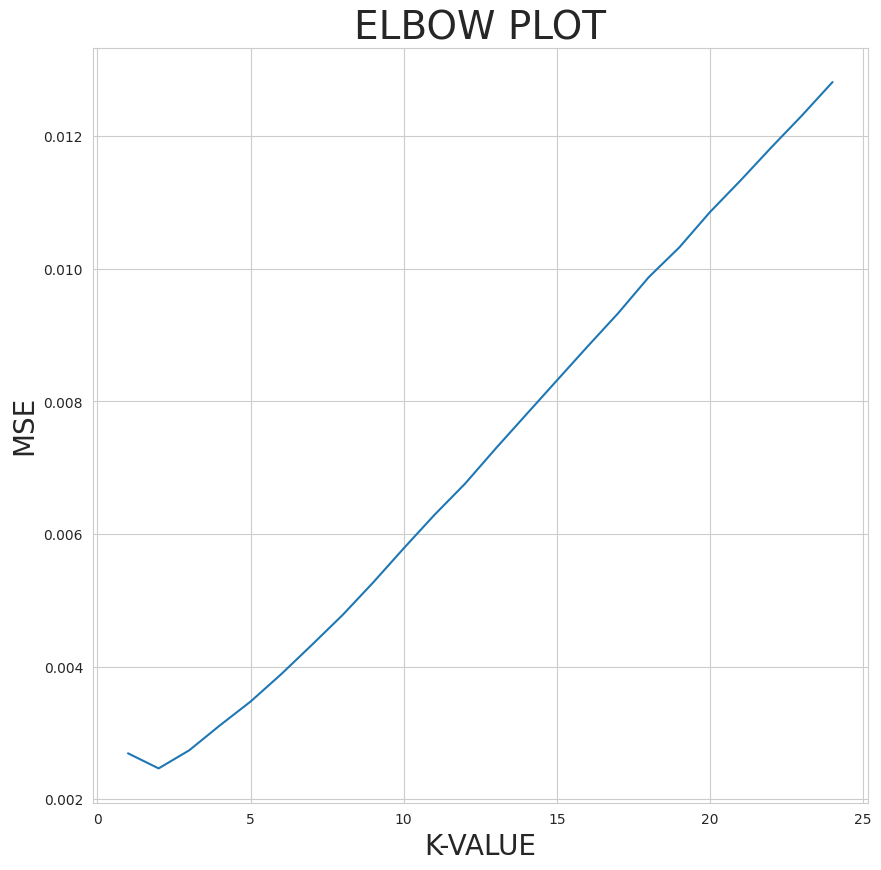

In [261]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,25,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(list(knn_dict.keys()),list(knn_dict.values()))
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

Podemos visualizar como existe una relación prácticamente lineal (o incluso efectos marginales decrecientes) entre el K value y MSE y por tanto, una correlación positiva fuerte. Cuantos más vecinos eligamos, mayor será el Mean Squared Error lo que supone que: con valores pequeños de K habrá poco sesgo pero mucha varianza y con valores elevados de K habrá mucho sesgo pero menos varianza. 
K es un hiper parámetro que tendremos que decidir, en función del trade-off que decidamos entre el sesgo y la varianza.

K es un hiper parámetro que tendremos que decidir, en función del trade-off que decidamos entre el sesgo y la varianza. En primer lugar, elegimos arbitrariamente 3 vecinos, el mean squared error del train: 0.0336 y el mean squared error del test: 0.0523 (MSE siempre será superior en test set), y por tanto existe una claro underfitting. 
Con GridSearchCV descubrimos que el MSE mínimo se consigue con 2 vecinos  (K=2), el mean squared error del train: 0.0254 y el mean squared error del test: 0.0496 (MSE siempre será superior en test set) y por tanto, con 2 vecinos, se minimiza el error total del conjunto (test+training), evitando posibles problemas de underfitting o overfitting, y consiguiendo la complejidad óptima del modelo.

No obstante, añadiendo la media ponderada de los vecinos basado en la distancia, el número óptimo para minimizar MSE será K=2.


In [262]:
mean_squared_error(y_test,y_knn_pred)

0.012819461976792363

### Forma 1: Train usando valor arbitrario k=3 (Forma 1)

In [263]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [264]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
train_rmse_knn = sqrt(mse)
print(f'Mean squared error del train: {train_rmse_knn}')

y_pred_knn = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_knn)
test_rmse_knn = sqrt(mse)
print(f'Mean squared error del test: {test_rmse_knn}')

Mean squared error del train: 0.033595585660966536
Mean squared error del test: 0.0523230601292069


### Forma 2: Train estimando el mejor número de vecinos (k) con GridSearchCV 

In [265]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 5)} #ya hemos visto en el elbow plot que el mejor es el 2
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters) #kfold set to default=5
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 5)})

In [266]:
gridsearch.best_params_

{'n_neighbors': 2}

Obtenemos que el mejor valor para k, es k=2

In [267]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse_knn_grid = sqrt(train_mse)
y_pred_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_grid)
test_rmse_knn_grid = sqrt(test_mse)
print(f'Mean squared error del train: {train_rmse_knn_grid}')

print(f'Mean squared error del test: {test_rmse_knn_grid}')

Mean squared error del train: 0.025468377509737284
Mean squared error del test: 0.049641131927011944


### Forma 3: Sumando una media ponderada de los vecinos basandose en las distancia 

In [269]:
parameters = {
    "n_neighbors": [2],
    "weights": ["uniform", "distance"],
}

# Ponemos de 2 en el primer parametro ya que hemos obtenido anteriormente que  es el valor optimo de k

gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

print(f'Mejores parametros: {gridsearch.best_params_}')

y_pred_weight = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_weight)
test_rmse_knn_weight = sqrt(test_mse)

print(f'Mean squared error del test: {test_rmse_knn_weight}')

Mejores parametros: {'n_neighbors': 2, 'weights': 'distance'}
Mean squared error del test: 0.047049410547565854


## **6.3 Decision Tree**
Los árboles de decisión son una técnica de aprendizaje supervisado e interpretable, tanto para problemas de clasificación como para problemas de regresión, que permiten evaluar mediante una representación gráfica los posibles resultados de una decisión compleja. Son muy útiles gráficamente pero pueden suponer altos niveles de varianza y por ende sobreajuste o overfitting. La predicción será la clase mayoritaria del nodo final en caso de clasificación y la media del nodo final en caso de regresión.

Al realizar un árbol de regresión podemos visualizar como las diferentes decisiones en función de X(0) supondrán un MSE (Mean Squared Error), una proporción del conjunto de datos y una probabilidad y valor diferente. Por ejemplo, si X(0)<= 0,05, X(0)<= -0,78 y X(0) <= -1.25, el mse= 0.01 samples = 2078 y value= 0.97. El MSE del árbol de regresión resulta ser muy bajo (=0.000484) lo que supone que la técnica es muy sofisticada y eficiente para predecir el precio del aguacate. 


In [297]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydot
# Puede ser necesario: brew install graphviz

model_tree = DecisionTreeRegressor(random_state=4)
model_tree.fit(X_train, y_train)
y_pred_dt = model_tree.predict(X_test)

test_mse_dt = mean_squared_error(y_test, y_pred_dt)
test_rmse_dt = sqrt(test_mse)
print(f'Mean squared error del test: {test_rmse_dt}')

Mean squared error del test: 0.047182725369270824


2.342059105262469e-07

### 6.3.2 Hyper parameters tuning con gridsearchCV. **Atención tarda 10 minutos en ejecutar!** 

In [271]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5,6,],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70] }

In [272]:
from sklearn.model_selection import GridSearchCV

In [273]:
tuning_model=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [274]:
def timer(start_time=None):            
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2

In [ ]:
#tuning_model.fit(X_train,y_train) #ATENCION!! Tarda unos 10 min en ejecutarse 
#No ejecutamos, ya que ya hemos encontrado los parametros
#descomentar para comprobar que ha encontrado correctamente los parametros

In [ ]:
#tuning_model.best_params_

In [275]:
#parametros no hardcodeados, si no que calculados ejecutando las celdas de arriba
tuned_hyper_model= DecisionTreeRegressor(max_depth=3,max_features='auto',max_leaf_nodes=40,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='best')
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', max_leaf_nodes=40,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1)

In [276]:
y_pred_dt_tuned=tuned_hyper_model.predict(X_test)

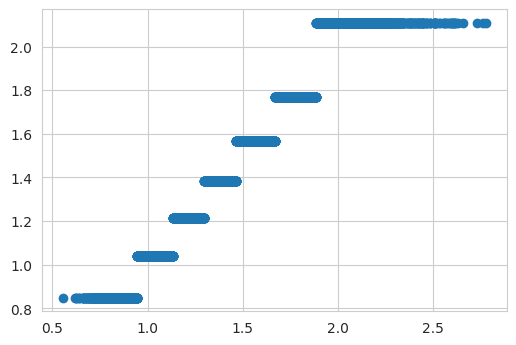

In [277]:
plt.scatter(y_test,y_pred_dt_tuned)

In [278]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred_dt_tuned))
test_rmse_dt_hyper=np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt_tuned))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt_tuned)))

MAE: 0.06173520503269432
MSE: 0.007252008071407814
RMSE: 0.08515872281456441


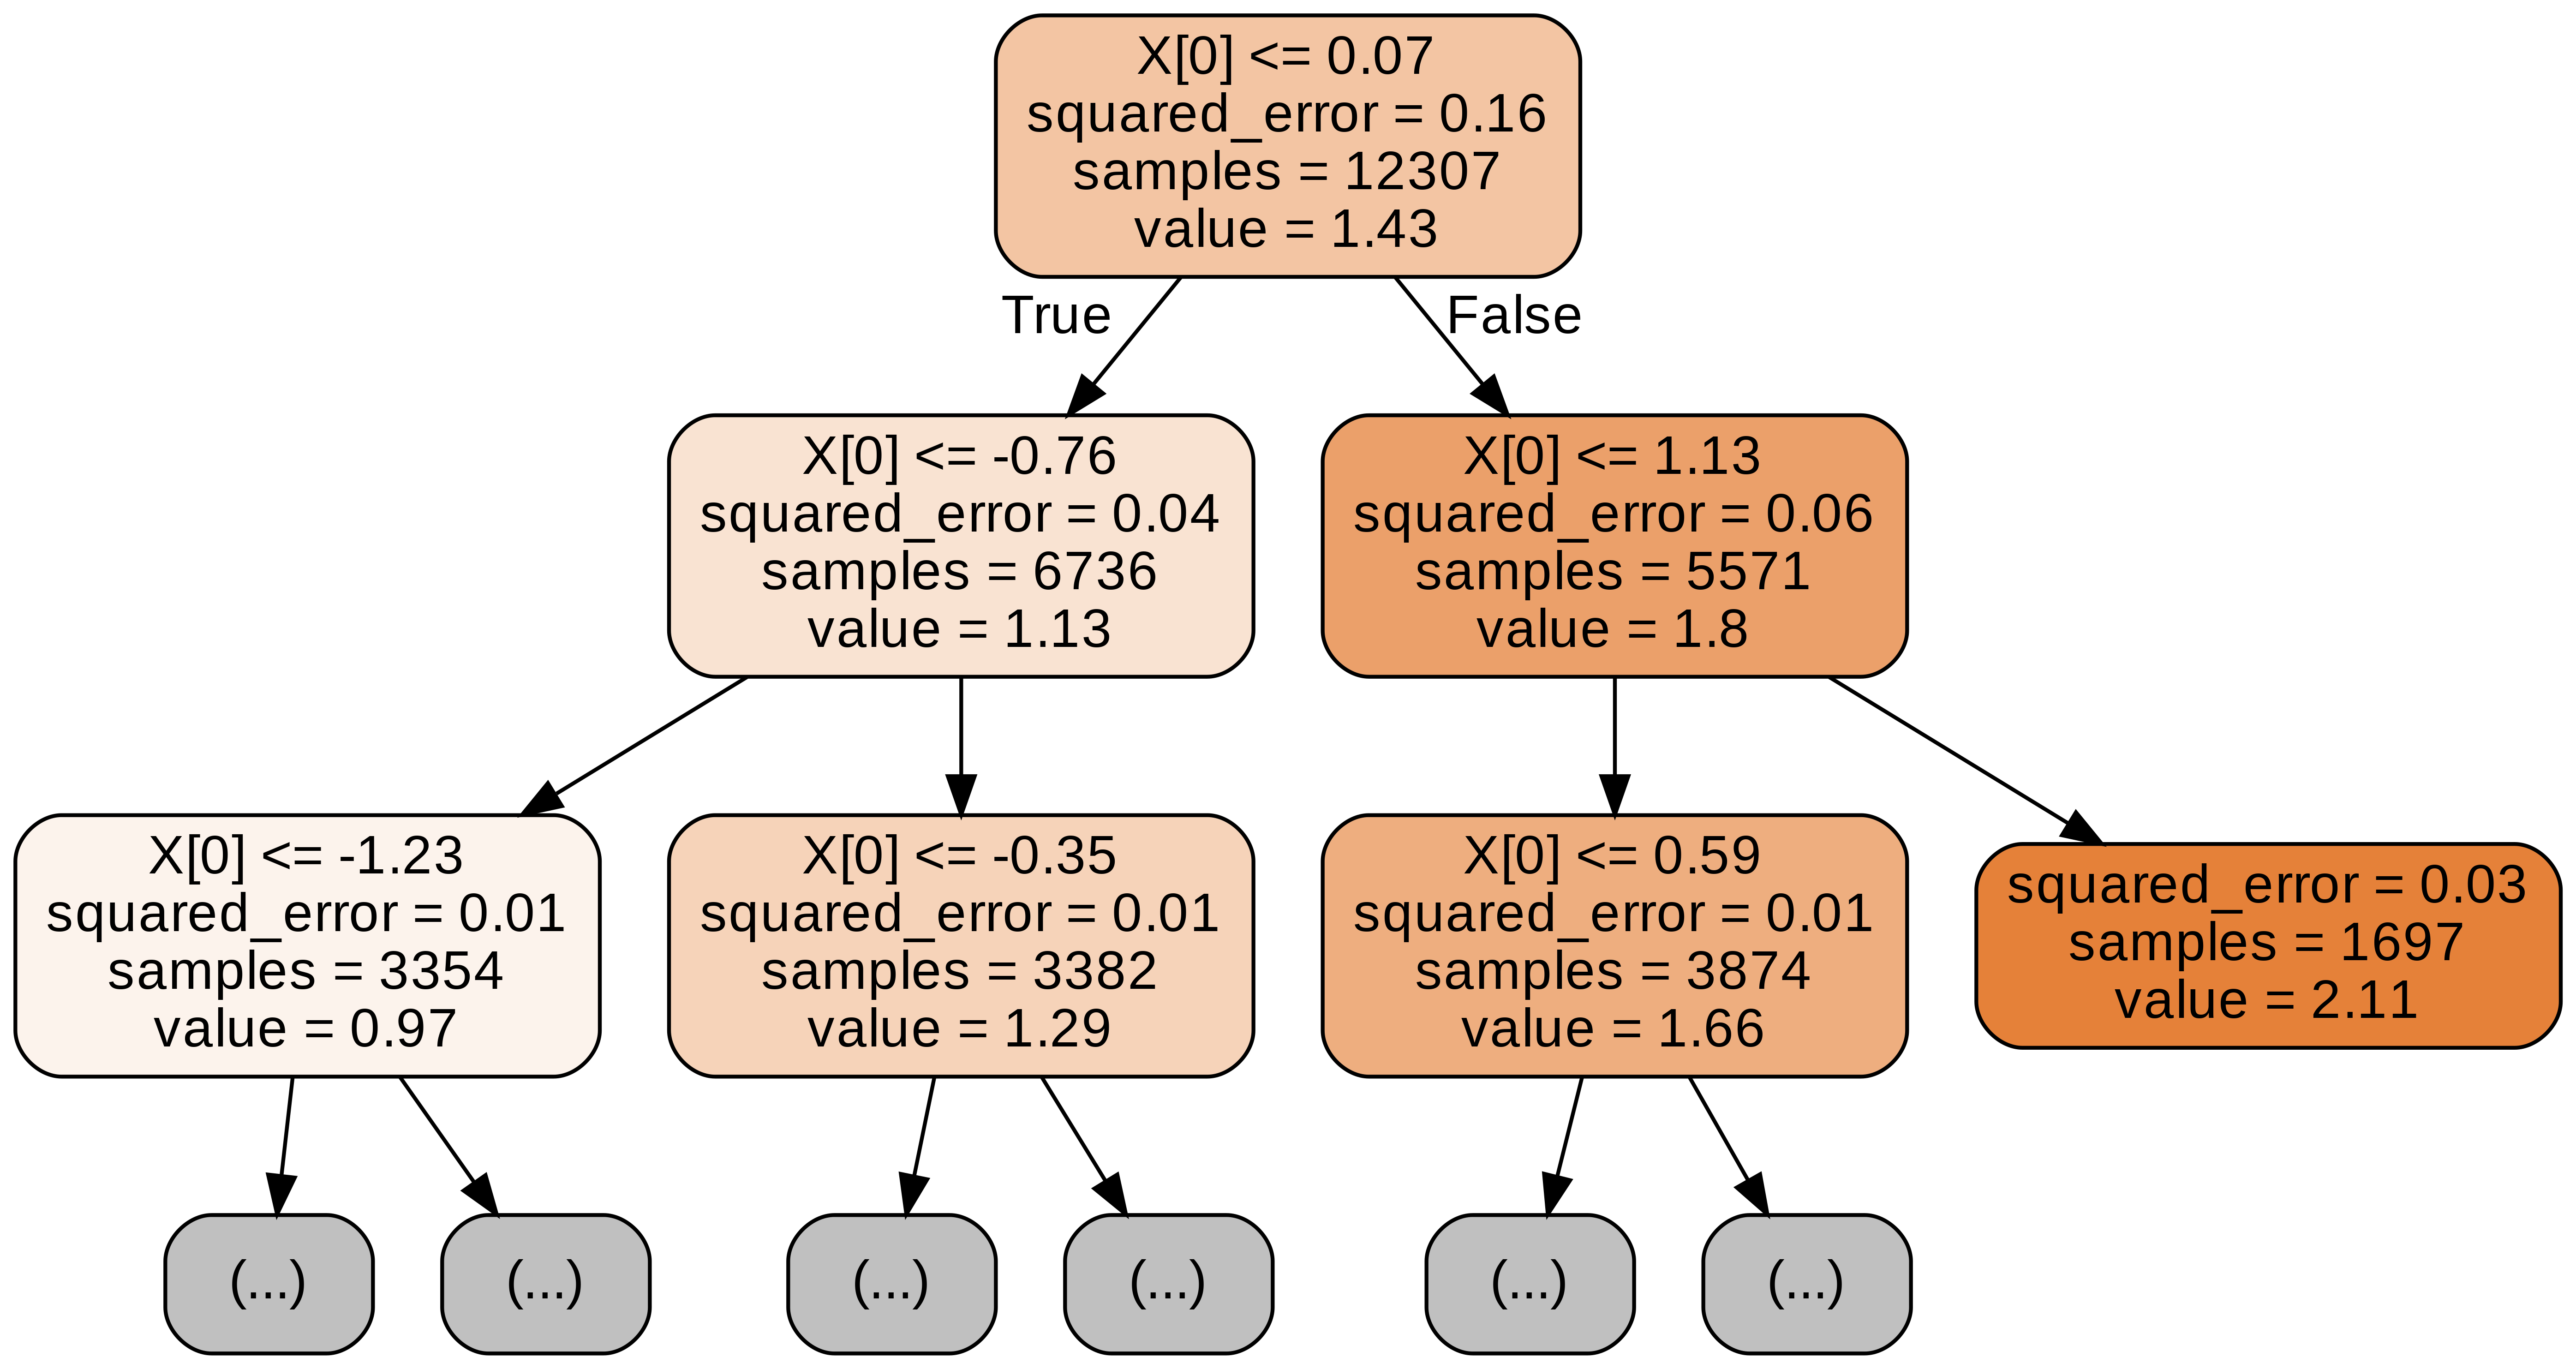

In [279]:
# Dibujamos el arbol

export_graphviz(tuned_hyper_model, 
                out_file='tree1.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth = 2)

# Limitamos el max_depth a 2 para que se vean las ramas claramente

from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree1.png')

## **6.4 Random Forest**
Random Forest  es una técnica supervisada basada en realizar varios árboles y combinar sus resultados, siendo este un método de Bagging (Boostrapped Aggregated Algorithm), extrayendo muchas muestras aleatorias con reemplazamiento y construyendo un árbol para cada una de ellas. No los podamos, dejando crecer los árboles, pero seleccionando solo algunas posibles variables de manera aleatoria para cada uno. Combinamos así los resultados, pudiendo ser estos las clasificaciones ( en la cual usamos la regla mayoría) y la regresión (utilizando la media). Si tenemos p variables solo cogemos algunas, y vamos cogiendo variables diferentes, conseguimos que salgan arboles diferentes, porque si cogemos siempre las mismas variables nos saldrán arboles prácticamente iguales (porque siempre hay una variable x más importante que las demás). La clave del Random Forest es que se selecciona un subconjunto de x (en las que , en nuestro ejemplo, por ejemplo el nivel de glucosa no esté entonces no sea la primera división). 
La clave es decidir cuantas variables se usan, el hiperparámetro es el número de variables x que se cogen m, en cada partición. 

 Como podemos observar, el MSE del random forest resulta ser 0,117, lo cual es ligeramente superior al MSE del árbol de decisión, y probablemente se deba a un error aleatorio.


In [280]:
from sklearn.ensemble import RandomForestRegressor
# Random forest con 100 arboles
rf = RandomForestRegressor(n_estimators = 100, max_depth = 2, random_state = 4)
# Limitamos, igual que antes, el max depth de cada arbol a 2

# Train del modelo en la training data
rf.fit(X_train, y_train);

In [281]:
# Predecimos
y_pred_rf = rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_rf)
test_rmse_rf = sqrt(test_mse)
print(f'Mean squared error del test: {test_rmse_rf}')

Mean squared error del test: 0.11794199967331576


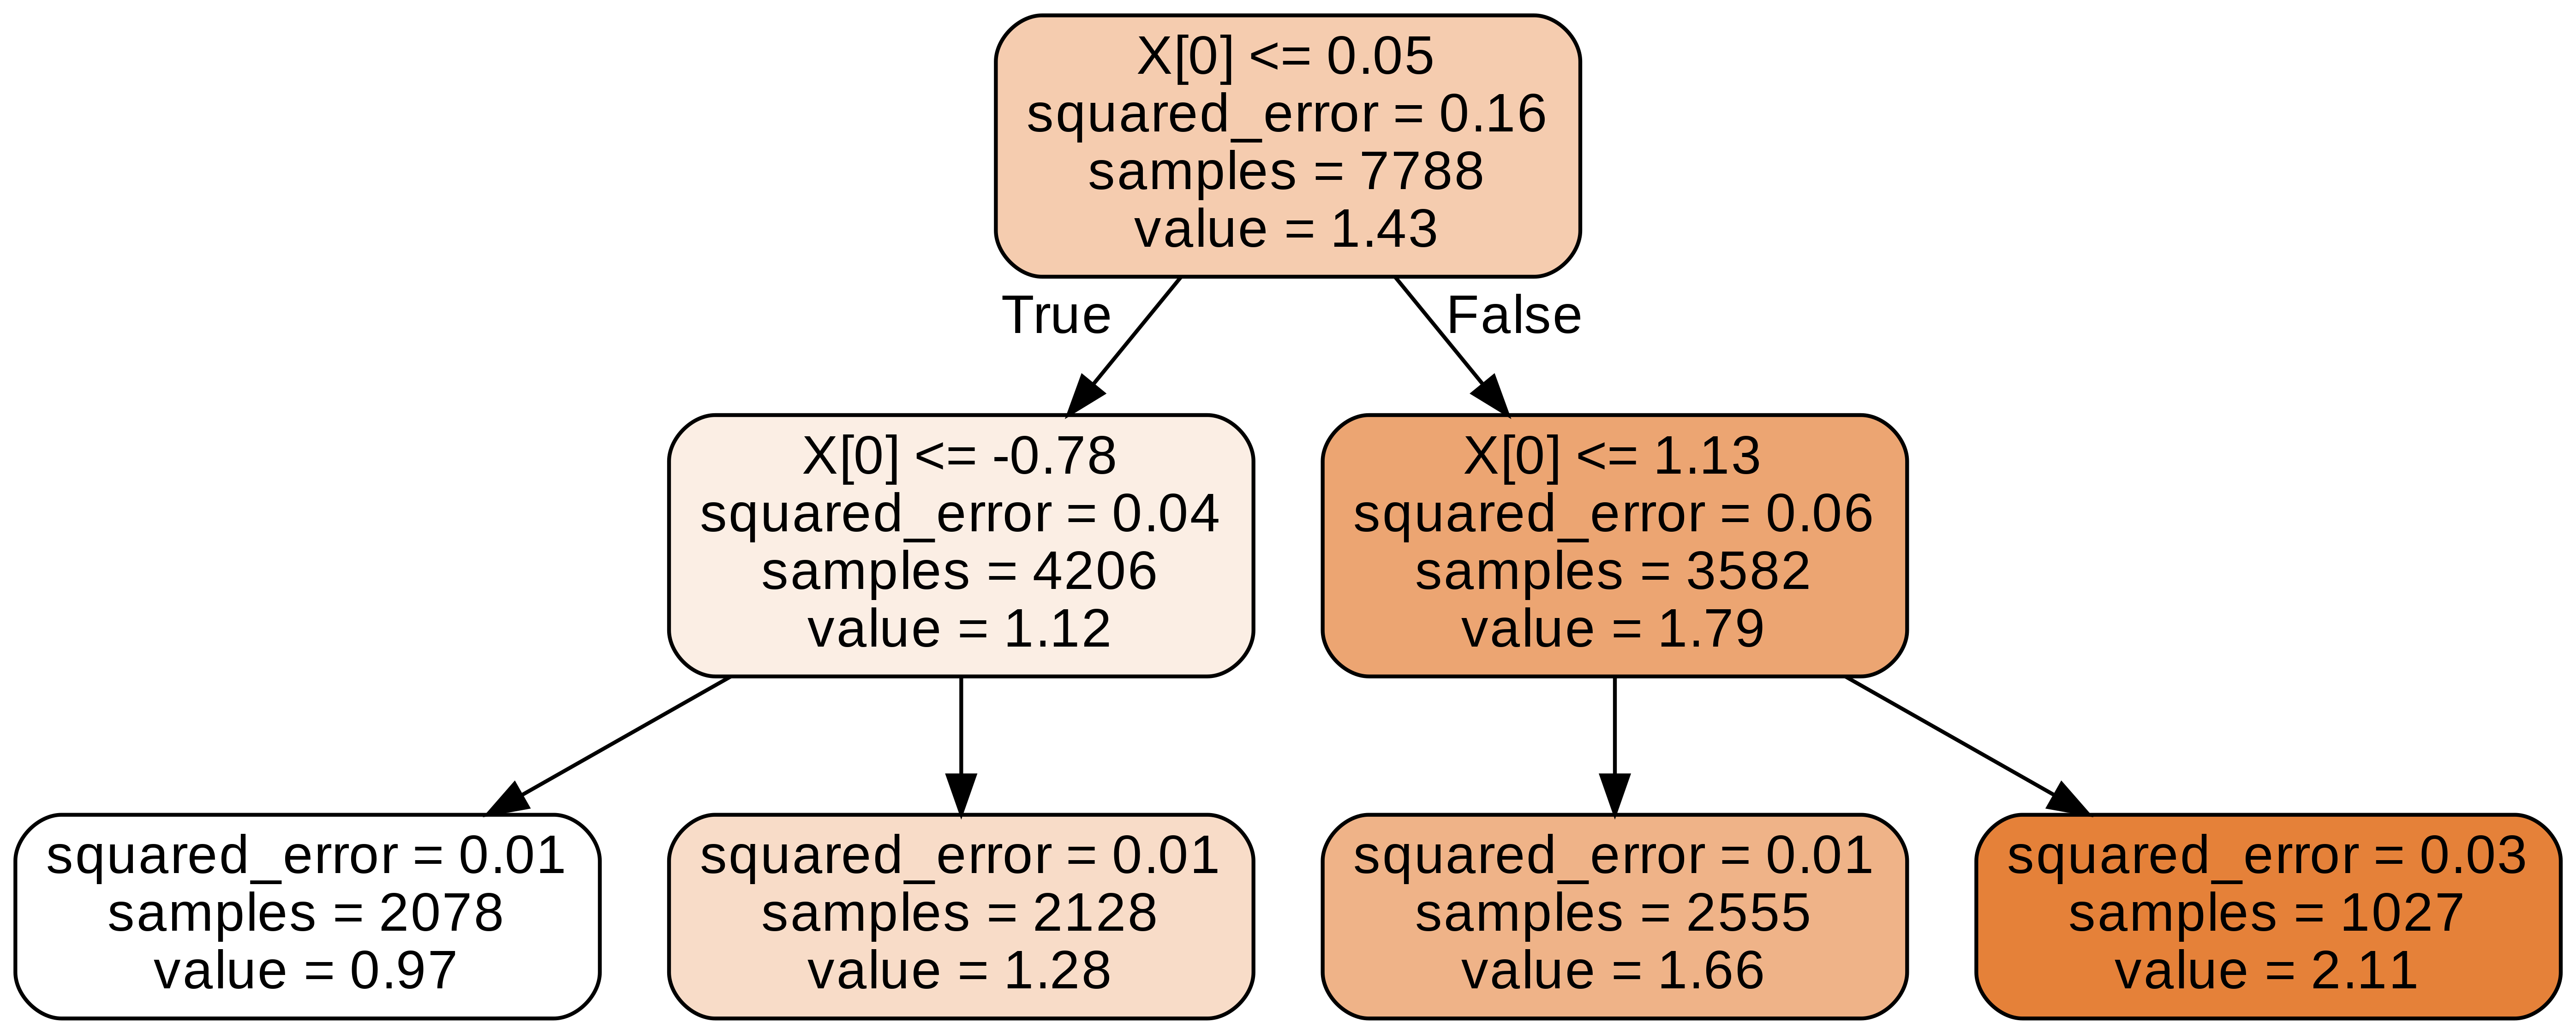

In [282]:
# Cogemos un arbol del random forest y lo dibujamos
estimator = rf.estimators_[5]
export_graphviz(estimator, 
                out_file='tree2.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth = 2)

from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree2.png')

## **6.5 Neural Network**
Las redes neuronales son técnicas de aprendizaje supervisado, empleadas tanto para  tareas de clasificación como de regresión. Son algoritmos de caja negra, compuestos por: neuronas (unidades básicas de procesamiento), con inputs de entrada y su respectiva función de activación (puede ser sigmoide, hiperbólicamente tangente o lineares); la red con capas de entrada, de salida y capas ocultas. El entrenamiento de la red neuronal dependerá de su learning rate (velocidad de aprendizaje) y de su momentum o inercia(preferencia a seguir yendo en la dirección que uno iba salvo que haya cambios muy grandes. No se cambia de dirección salvo que haya un obstáculo muy grande). El ajuste puede ser caso a caso, en batch o Epoch (cada vez que se ha entrenado a todos los casos).

Decidimos realizar una red neuronal con 2 capas ocultas, y después entrenarlo con 5 EPOCHs y por btatchs de 128 elementos. Nuestro Mean squared error del test es de    0.0879, lo cual es muy bajo, y muestra que una red neuronal no tan compleja como la realizada puede llegar a resultar en grandes mejoras en el sesgo y la varianza.

### **Importing libraries**

In [283]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import keras
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout,Activation # Types of layers to be used in our model
from keras.utils import np_utils   
import tensorflow as tf

### **First hidden layer**

In [284]:
model = Sequential()
model.add(Dense(512, input_shape=(72,),))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [285]:
model.output_shape

(None, 512)

### **Second hidden layer**

In [286]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

### **Final Output layer**

In [287]:
model.add(Dense(1, kernel_initializer='normal'))

In [288]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               37376     
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

### **Compiling the model**

In [289]:
model.compile(optimizer='adam',loss='mean_squared_error')

### **Train the model**

In [290]:
model.fit(X_train, y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
97/97 [==============================] - 2s 12ms/step - loss: 0.0941
Epoch 2/5
97/97 [==============================] - 1s 13ms/step - loss: 0.0216
Epoch 3/5
97/97 [==============================] - 1s 13ms/step - loss: 0.0165
Epoch 4/5
97/97 [==============================] - 1s 12ms/step - loss: 0.0134
Epoch 5/5
97/97 [==============================] - 1s 12ms/step - loss: 0.0122


### **Evaluate the model on test data**

In [291]:
y_pred_rn = model.predict(X_test)

In [292]:
y_pred_rn

array([[2.104415 ],
       [1.5009643],
       [1.8022478],
       ...,
       [2.187317 ],
       [1.7105663],
       [1.241373 ]], dtype=float32)

In [293]:
test_mse = mean_squared_error(y_test, y_pred_rn)
test_rmse_rn = sqrt(test_mse)
print(f'Mean squared error del test: {test_rmse_rn}')

Mean squared error del test: 0.0648522810506029


# **7. Ensembles**

## **7.1 Bagging KNN**
Los ensembles suponen un conjunto de algoritmos cuyos outputs se combinan de manera eficiente para obtener un output óptimo. Reducen tanto el sesgo como la varianza del modelo, resultando en una mayor estabilidad, verosimilitud y eficiencia. Un ensemble es un conjunto de modelos de machine learning. Cada modelo produce una predicción diferente. Las predicciones de los distintos modelos se combinan para obtener una única predicción.

La ventaja que obtenemos al combinar modelos diferentes es que como cada modelo funciona de forma diferente, sus errores tienden a compensarse. Esto resulta en un mejor error de generalización.Existen tres tipos de ensembles (bagging, boosting y stacking), según como se realice.
 
En primer lugar, hemos realizado un ensemble de KNN, siendo un ejemplo de método de Bagging, según el cual varios modelos del mismo tipo son entrenados con diferentes muestras del dataset. Pese a ser utilizado normalmente con random forest, puede ser también empleado en KNN. Tras realizar el Bagging, podemos observar como el MSE ha bajado relativamente, frente a la técnica de KNN simple empleada en el punto 6.2), logrando un MSE de 0,047, y por tanto una varianza más baja. Esto muestra cómo, con ensembles, mejorará el modelo predictivo.


In [294]:
from sklearn.ensemble import BaggingRegressor

best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)
y_pred_bagg_knn = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_bagg_knn)
test_rmse_bagg1 = sqrt(test_mse)
print(f'Mean squared error del test: {test_rmse_bagg1}')

Mean squared error del test: 0.047182725369270824


## **7.2 Bagging, boosting y stacking de modelos breves**

In [298]:
import os
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [299]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error   

### **7.2.1 Modelos breves: Linear Regression,Lasso, Elastic net y Ridge Regression**

Utilizaremos los modelos más abajo descritos, para realizar con ellos un ensemble de modelos. Realizaremos el ensemble mediante todos los métodos vistos este curso: Stacking, Boosting y Bagging


*   LinearRegression ajusta un modelo lineal con coeficientes w = (w1, …, wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.
*   El Lasso es un modelo lineal que estima coeficientes dispersos. Es útil en algunos contextos debido a su tendencia a preferir soluciones con menos coeficientes distintos de cero, reduciendo efectivamente el número de características de las que depende la solución dada. Este modelo puede ser muy sensible a los valores atípicos. Así que tenemos que hacerlo más robusto en ellos. Para eso usamos el método Robustscaler() de sklearn en "pipeline"

*   Elastic-net es útil cuando hay múltiples funciones que están correlacionadas entre sí. Es probable que Lasso elija uno de estos al azar, mientras que elastic-net probablemente elija ambos.
Una ventaja práctica de la compensación entre Lasso y Ridge es que permite que Elastic-Net herede parte de la estabilidad de Ridge bajo rotación.
Este modelo puede ser muy sensible a los valores atípicos. Así que tenemos que hacerlo más robusto en ellos. Para eso usamos el método Robustscaler() de sklearn en la canalización
*   La Ridge regression aborda algunos de los problemas de los mínimos cuadrados ordinarios al imponer una penalización en el tamaño de los coeficientes.





In [300]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)
models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= 4))
score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= 4))
score = rmse(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

LinearRegression Score= 2.955387714905039e-15
Lasso Score= 0.0007688455992357203
ElasticNet Score= 0.0007382632108366878
KernelRidge Score= 0.0006972378264567122


In [301]:
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
0,LinearRegression,2.955388e-15
3,KernelRidge,6.972378e-04
2,ElasticNet,7.382632e-04
1,Lasso,7.688456e-04


### **7.2.2 Boosting**

Vamos a utilizar los algoritmos GradientBoostingRegressor, XGBRegressor, LGBMRegressor. Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores.

**GradientBoostingRegressor**

Gradient Boosting para regresión.
GB construye un modelo aditivo en una forma avanzada por etapas; permite la optimización de funciones de pérdida diferenciables arbitrarias. Cada etapa se ajusta un árbol de regresión sobre el gradiente negativo de la función de pérdida dada.

In [308]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state = 4)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 0.01563415352022602


**XGBRegressor**

XGBRegressor es una librería de aumento de gradiente distribuida optimizada, diseñada para ser altamente eficiente, flexible y portátil.
Implementa algoritmos de aprendizaje automático bajo el marco Gradient Boosting.
XGBoost proporciona un impulso de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de una manera rápida y precisa.

In [303]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 4)
score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 0.02108190865969933


 **LGBMRegressor**

Light GBM es un framework de gradient boosting que utiliza un algoritmo de aprendizaje basado en árboles

In [304]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = 4)

score = rmse(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

LGBMRegressor Score= 0.03160962230518112


### **7.2.3 Stacking**

Podemos usar sklearns StackingClassifier y StackingRegressor para problemas de clasificación y regresión respectivamente. Dado que la regresión lineal es nuestro modelo de mejor rendimiento, lo usaremos como nuestro estimador final y el resto de modelos como estimadores básicos. El stacking es un procedimiento general en el que se entrena a un learner para combinar a los learners individuales. Aquí, los learners individuales se denominan learners de primer nivel, mientras que el combiner se denomina learner de segundo nivel o meta-learner

In [309]:
n_jobs = -1

estimators = [ ('elastic_net', elastic_net), ('kernel_ridge', kernel_ridge),('xgb_regressor', xgb_regressor) ]

stack = StackingRegressor(estimators=estimators, final_estimator= linear_regression, cv= 5, n_jobs= n_jobs, passthrough = True)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)

rmse_val = mean_squared_error(y_test, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')

rmse= 2.6047248746591412e-15


### **7.2.4 Bagging**


Respecto al funcionamiento del Bagging, si disponemos de muchas muestras de entrenamiento, podemos utilizar cada una de ellas para entrenar un modelo que después nos servirá para hacer una predicción. De este modo tendremos tantas predicciones como modelos y por tanto tantas predicciones como muestras de entrenamiento. El procedimiento consistente en promediar todas las predicciones anteriores tiene dos ventajas importantes: simplifica la solución y reduce mucho la varianza.

In [306]:
def bagging_predictions(estimator):
    """
    I/P
    estimator: The base estimator from which the ensemble is grown.
    O/P
    br_y_pred: Predictions on test data for the base estimator.
    
    """
    regr = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            n_jobs= n_jobs,
                            random_state=4).fit(X_train, y_train)

    br_y_pred = regr.predict(X_test)

    rmse_val = mean_squared_error(y_test, br_y_pred, squared= False) # squared= False > returns Root Mean Square Error   

    print(f'RMSE for base estimator {regr.base_estimator_} = {rmse_val}\n')
    return br_y_pred


predictions = np.column_stack((bagging_predictions(linear_regression),
                              bagging_predictions(lasso),
                              bagging_predictions(elastic_net),
                              bagging_predictions(kernel_ridge)))
print(f"Bagged predictions shape: {predictions.shape}")
       
y_pred = np.mean(predictions, axis=1)
print("Aggregated predictions (y_pred) shape", y_pred.shape)

rmse_val = mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error   
models_scores.append(['Bagging', rmse_val])

print(f'\nBagging RMSE= {rmse_val}')

RMSE for base estimator Pipeline(steps=[('linearregression', LinearRegression())]) = 3.687116533929425e-15

RMSE for base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=4))]) = 0.000768198684741494

RMSE for base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=4))]) = 0.0007376218133823812

RMSE for base estimator KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial') = 0.0007167437369922298

Bagged predictions shape: (5275, 4)
Aggregated predictions (y_pred) shape (5275,)

Bagging RMSE= 0.000481066988523766


### **Conclusiones Ensembles**

In [311]:
ensembles=pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)
ensembles #los modelos duplicados (Stacking y GBR) son por ejecutar dos veces la misma celda
          #ya que tardan un tiempo considerable en cargar los modelos, no hemos rejecutado las celdas, pero el problema se solucionaría de esta simple manera

,0,1
10,Stacking,2.604725e-15
0,LinearRegression,2.955388e-15
8,Bagging,4.810670e-04
3,KernelRidge,6.972378e-04
2,ElasticNet,7.382632e-04
1,Lasso,7.688456e-04
7,Stacking,7.690207e-04
4,GradientBoostingRegressor,1.563415e-02
9,GradientBoostingRegressor,1.563415e-02
5,XGBRegressor,2.108191e-02


# **8. Conclusiones Finales**




## **Consideraciones Generales**

La predicción del precio medio del aguacate tiene una gran utilidad práctica y económica en la realidad social en la que vivimos. El aguacate es una fruta considerada de lujo, con un impacto económico muy elevado en la economía mundial y una materia prima necesaria para miles de establecimientos en Estados Unidos, donde hemos  enfocado nuestro estudio. 

Su precio, por tanto, será de extrema importancia para medir o predecir posibles incrementos en la inflación, en los costes medios de los establecimientos mercantiles o empresas que lo utilicen, y los gastos que deben soportar las familias americanas. La posibilidad de planear dichos costes siempre será útil para que las empresas ideen maneras de minimizar costes y maximizar beneficios.

Además, el precio medio de los aguacates puede mostrar una correlación directa muy fuerte con el precio de otras frutas en la misma zonal ya que los lugares donde más  aguacate se exporta, como México, también son grandes exportadores de otras frutas, lo cual significa que los factores que afectan al precio de los aguacates pueden afectar notablemente a otras frutas. Esto supone que nuestros modelos de predicción pueden ser de gran utilidad para el sector agrícola americano en su conjunto y el extremadamente alto impacto que el sector agrícola tiene en la economía.

Todos nuestros modelos han resultado tener un MSE muy bajo, especialmente los árboles de regresión, cuyo MSE, la mejor manera de calificar como de bueno es un modelo, es inferior a   0.0001, suponiendo por tanto un modelo eficaz y óptimo para predecir el precio de los aguacates.

En relación con las limitaciones, hemos visto que nuestros modelos serán de gran utilidad para el “nowcasting”, es decir, la predicción de los precios del aguacate en el presente y el futuro cercano, asumiendo la oferta y demanda actual. No obstante, no podrá ser utilizado para el “Forecasting”, la predicción de dichos precios a futuro, ya que dependerá de la oferta y demanda en dicho momento, que será diferente a la actual.  

##**8.1 Data Visualisation Predicciones**

In [343]:

test_error=[test_rmse_rl,test_rmse_knn, test_rmse_knn_grid,test_rmse_knn_weight,test_rmse_dt,test_rmse_dt_hyper,test_rmse_rf,test_rmse_rn,test_rmse_bagg1]
models_list=['Linear Regression','Knn random','Knn ridge','Knn weight','Decision Tree','Decission Tree Hypertuned' ,'Randomm Forest','Neural Network','Bagging Knn']
 #'Train Error':train_error,
test_error1={0:test_error}

In [345]:
df_errors=pd.DataFrame(data=test_error1,index=models_list)
df_errors

,0
Linear Regression,0.052323
Knn random,0.052323
Knn ridge,0.049641
Knn weight,0.047049
Decision Tree,0.047183
Decission Tree Hypertuned,0.085159
Randomm Forest,0.117942
Neural Network,0.064852
Bagging Knn,0.047183


In [364]:
ensembles=ensembles.set_index(ensembles[0])#ensemblesensembles[0]


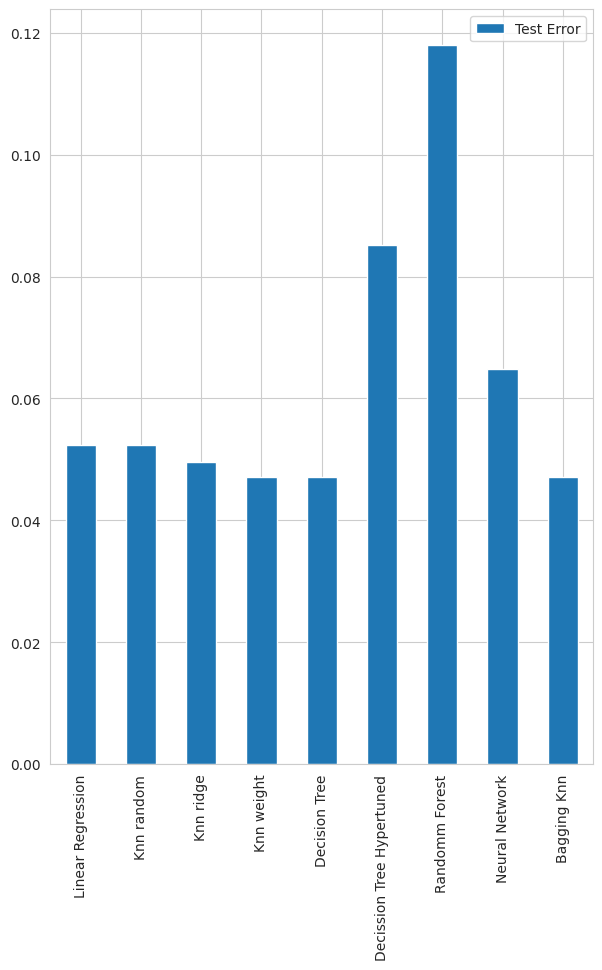

In [296]:
df_errors.plot(kind='bar',figsize=(7,10))

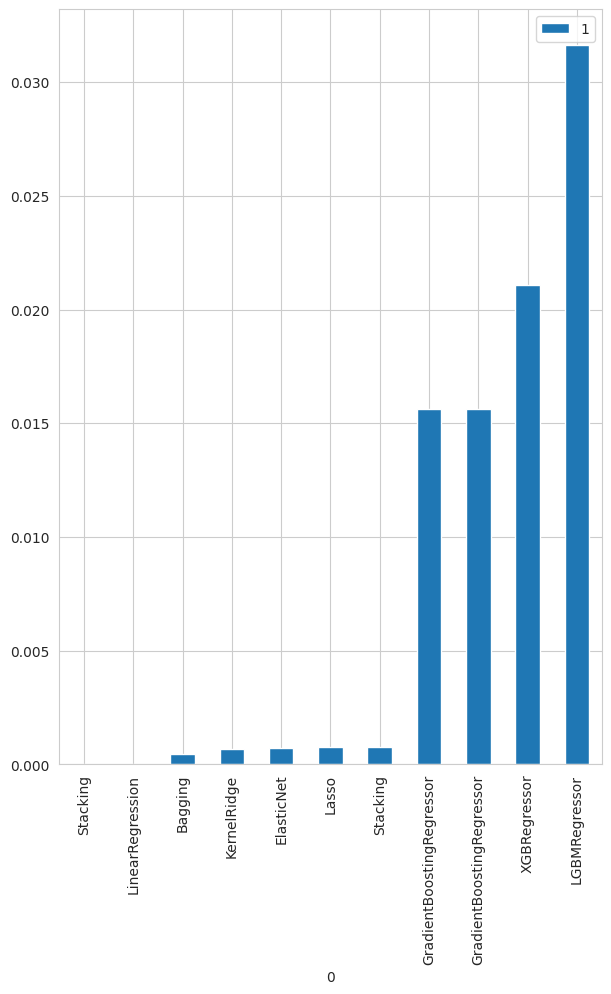

In [365]:
ensembles.plot(kind='bar',figsize=(7,10)) #dos stacking y GBR por la ejecución doble de una celda anterior

## **8.2 Interpretación**

Como conclusión, interpretando los modelos según RMSE del training set, podemos afirmar claramente que la realización de los ensembles ha reducido considerablemente el error de los modelos. En especial, es el **stacking** el que mejor resultados nos proporciona. Esto era un resultado esperado puesto que el stacking junta modelos de distintos tipos y entrena también un modelo supervisor, que aprende a combinar las mejores combinaciones para mejorar las predicciones de los modelos primarios. Por otro lado, en cuanto a los modelos en sí, en los cuales no realizamos ensemble, nos llama la atención el error tan alto que obtenemos en el decision tree con los parámetros tuneados. Probablemente este modelo requirirá mayor perfeccionamiento y mejora, pues el resultado obtenido no es el propio de un modelo cuyos parámetros han sido seleccionados tras 15 minutos de trabajo computacional.